# Nelder-mead algorithm

In [1]:
import numpy as np
%matplotlib inline 
from IPython.core.display import display
from sympy import *
import matplotlib.figure
init_printing()
#from math import *
from interval import interval
from interval import imath
import sys
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.animation as animation
from  matplotlib.tri import Triangulation

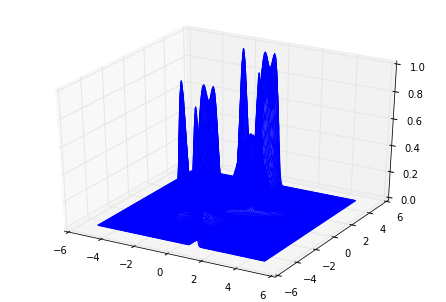

In [2]:
def activate_func(x, func_str):
    """
    params:
        x = np.array([x_1, x_2])
    """
    x_1, x_2 = x
    exp = np.exp
    sin = np.sin
    cos = np.cos
    return eval(func_str)
    

nn_str = '0.6*exp(-4*(x_1-2*x_2)**2 - 6*(x_2-0.5)**2) + exp(-7*(cos(2*x_1) - (x_1 - sin(x_2)))**2 - 9*(0.9*cos(x_2))**2)'
x = np.arange(-5, 5, 0.05) 
y = np.arange(-5, 5, 0.05) 

X, Y = np.meshgrid(x, y)
Z = np.apply_along_axis(activate_func, 0, np.array([X.flatten(), Y.flatten()]), nn_str).reshape(X.shape)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z) 
plt.show()

## 最大値を求めたい

In [23]:
def generate_poins(x_1, x_2):
    return np.array([[x_1, x_2], [x_1+1, x_2], [x_1, x_2+1]])

points = generate_poins(0.8, 0.45)
points = np.array(sorted(points, key=lambda x: activate_func(x, nn_str))) #最小値を求める問題に変換

print map(lambda x: -1 * activate_func(x, nn_str), points)
print points

def save_fig(X,Y,Z, points, filepath):
    fig = plt.figure(figsize=(6,6))
    im =plt.contour(X, Y, Z, 20, alpha=0.55, zorder=-1, shading='gouraud')
    triang=  matplotlib.tri.Triangulation(*points.T)
    plt.triplot(triang, 'bo-')
    plt.xlim((-2,2))
    plt.ylim((-2,2))
    fig.savefig(filepath)
    plt.close(fig)


[-0.023148492398024415, -0.56880414654939204, -0.7460116448670423]
[[ 1.8   0.45]
 [ 0.8   0.45]
 [ 0.8   1.45]]


In [24]:
class NelderMead():
    def __init__(self, func, alpha=1, gamma=2, rho=0.5, sigma=0.5, solve='min'):
        solve_map = {'min': 1, 'max': -1}
        self.func = func #* solve_map[solve]
        self.points = np.array(sorted(points, key=lambda x: func(x)))
        self.alpha = alpha
        self.gamma = gamma
        self.rho = rho
        self.sigma = sigma

    @property
    def x_o(self): # centroid(重心)
        return np.mean(self.points[:-1], axis=0)
    
    @property
    def x_r(self):
        x_r = self.x_o + self.alpha * (self.x_o - self.points[-1])
        return x_r  
    
    @property
    def x_e(self):
        x_e = self.x_o + self.gamma * (self.x_r - self.x_o)
        return x_e
    
    @property
    def x_c(self):
        x_c = self.x_o + self.rho * (self.x_o - self.points[-1])
        return x_c
    
    def reflection(self):
        self.points[-1] = self.x_r
        
    def expansion(self):
        if self.func(self.x_e) < self.func(self.x_r):
            self.points[-1] = self.x_e
        else:
            self.points[-1] = self.x_r
    
    def contraction_and_shrink(self):
        if self.func(self.x_c) < self.func(self.points[-1]):
            self.points[-1] = self.x_c
        else:
            self.points = self.points[0] + self.sigma * (self.points - self.points[0])
        
    def proceed(self): # 1回更新する
        if self.func(self.points[0]) <= self.func(self.x_r) < self.func(self.points[-1]):
            self.reflection()
        elif self.func(self.x_r) < self.func(self.points[0]):
            self.expansion()
        else:
            self.contraction_and_shrink()
        self.points = self.points
        
    def run(self, times=5):
        for i in range(times):
            print '------------ start ------------------'
            self.proceed()
            self.points = np.array(sorted(self.points, key=lambda x: func(x)))
            print self.points
            print '---'*10            
           
        
        

In [31]:
func = lambda (x_1, x_2), exp=np.exp, cos=np.cos, sin=np.sin: -1 * (eval(nn_str))

points = generate_poins(-1.2, 0.3)
points = np.array(sorted(points, key=lambda x: activate_func(x, nn_str))) #最小値を求める問題に変換
nelder = NelderMead(func)
path_format = 'nelder_{0:0>3}.png'

save_fig(X,Y,Z, nelder.points, path_format.format(0))
for i in range(1,15+1):
    print i,
    nelder.proceed()
    save_fig(X,Y,Z, nelder.points, path_format.format(i))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
